In [ ]:
!pip install detecto

In [ ]:

!wget 'https://github.com/StatisticsHackathon/custom-object-detection/releases/download/v1/Dataset.zip'
!unzip 'Dataset.zip' -d './Dataset'

In [16]:
from detecto import core, utils, visualize
# import detecto

path = './Dataset'
train = core.Dataset('./Dataset/all')
validation = core.Dataset('./Dataset/validation')

model = core.Model(['chip', 'handwriting'])

# model.fit(train,   epochs = 10)

In [17]:
from detecto import core, utils, visualize

from torchvision import transforms


augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

train = core.Dataset('./Dataset/all')
validation = core.Dataset('./Dataset/validation')

loader = core.DataLoader(train, batch_size=2, shuffle=True)
loader2 = core.DataLoader(validation, batch_size=2, shuffle=True)

model = core.Model(['chip', 'handwriting'])

losses = model.fit(loader, loader2, epochs=20, learning_rate=0.0001 )

  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.7666123021732677
Epoch 2 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.6308455250479958
Epoch 3 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5639770085161383
Epoch 4 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5606185577132485
Epoch 5 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5319613055749373
Epoch 6 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5393260067159479
Epoch 7 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5436171726746992
Epoch 8 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5341381647370078
Epoch 9 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5336686914617365
Epoch 10 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5489958307959817
Epoch 11 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5580629056150263
Epoch 12 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5311677564274181
Epoch 13 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5423394224860452
Epoch 14 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5385788679122925
Epoch 15 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5437263196164911
Epoch 16 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5444054657762701
Epoch 17 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5344548604705117
Epoch 18 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5279993414878845
Epoch 19 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/16 [00:00<?, ?it/s]

Loss: 0.5402097160165961
Epoch 20 of 20
Begin iterating over training dataset


  0%|          | 0/6 [00:00<?, ?it/s]

Begin iterating over validation dataset


100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

Loss: 0.5180395408110186


In [21]:
path = './Dataset/validation'

def predict(img):
  image = utils.read_image(img)
  predictions = model.predict(image)

  # predictions format: (labels, boxes, scores)
  labels, boxes, scores = predictions

  # ['alien', 'bat', 'bat']

  if 'handwriting' in labels:
    print('handwritng present')

  len=0
  for score in scores:
    if score >=0.6:
      len=len+1

  
  visualize.show_labeled_image(image, boxes, labels)
  # return len
  # print(labels)

  #           xmin       ymin       xmax       ymax
  # tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
  #         [ 276.2478,  144.0074,  579.6044,  508.7444],
  #         [ 277.2929,  162.6719,  627.9399,  511.9841]])
  # print(boxes)

  # tensor([0.9952, 0.9837, 0.5153])
  # print(scores)
  return len

./Dataset/validation/2001.jpg


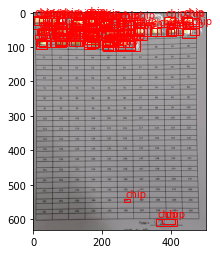

2001 6
./Dataset/validation/2002.jpg


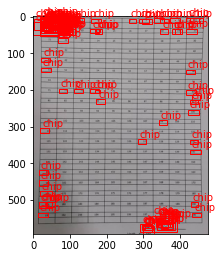

2002 1
./Dataset/validation/2003.jpg


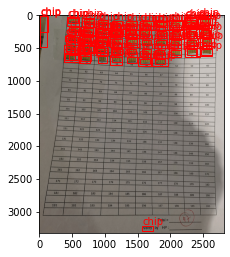

2003 32
./Dataset/validation/2004.jpg


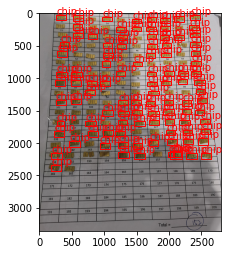

2004 40
./Dataset/validation/2005.jpg


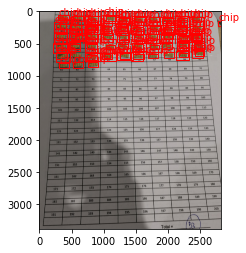

2005 38
./Dataset/validation/2006.jpg


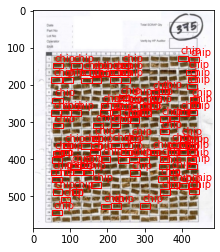

2006 100


In [25]:
imgs = [i for i in range(2001,2007,1)]

for img in imgs:
  print(path+'/'+str(img)+'.jpg')
  num_chips = predict(path+'/'+str(img)+'.jpg')
  print(img, num_chips)